# Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [2]:
def data_sorting(folder_name):
    
    fitness = pd.DataFrame()
    age = pd.DataFrame()
    score = pd.DataFrame()
    
    data = pd.DataFrame()
    
    for i, data_dir in enumerate(os.listdir(os.path.join('data', folder_name))):

        data1 = pd.read_csv(os.path.join('data', folder_name, data_dir), header = None)
        data1.columns = ['gen', 'log']

        fitness[i] = data1.log.apply(lambda x: float(x.split(',')[0].replace('[', '')))
        age[i] = data1.log.apply(lambda x: float(x.split(',')[1]))
        score[i] = data1.log.apply(lambda x: float(x.split(',')[2].replace(']', '')))

    
    data['avg_fitness'] = fitness.mean(axis = 1)
    data['avg_fitness'] = data['avg_fitness'].apply(lambda x: np.log(x))
    data['avg_age'] = age.mean(axis = 1)
    data['avg_score'] = score.mean(axis = 1)
    
    data['std_fitness'] = fitness.std(axis = 1)
    data['std_fitness'] = data['std_fitness'].apply(lambda x: np.log(x))
    data['std_age'] = age.std(axis = 1)
    data['std_score'] = score.std(axis = 1)
    
    return data, score.iloc[-1], age.iloc[-1],  fitness.iloc[-1].apply(lambda x: np.log(x))

In [3]:
def plot_features(data, std = False):
    
    if std:
        
        plt.errorbar(data.index, data.avg_score, data.std_score, alpha = 0.3)
        plt.title('Avg Score over the generations with standard deviation')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.errorbar(data.index, data.avg_age, data.std_age, alpha = 0.3)
        plt.title('Avg Age over the generations with standard deviation')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.errorbar(data.index, data.avg_fitness, data.std_fitness, alpha = 0.3)
        plt.title('Log(Avg Fitness) over the generations with standard deviation')
        plt.xlabel('Generation')
        plt.ylabel('Log(Avg Fitness)')
        plt.show()
    
    else:
        
        plt.plot(data.index, data.avg_score)
        plt.title('Avg Score over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.plot(data.index, data.avg_age)
        plt.title('Avg Age over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.plot(data.index, data.avg_fitness)
        plt.title('Log(Avg Fitness) over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Log(Avg Fitness)')
        plt.show()

In [4]:
def compare_data(folder_list, std = False, boxplot = False):
    
    data_dict = {}
    
    for folder in folder_list:
        
        data_dict[folder.split('.')[0]] = data_sorting(folder)
    
    for data_label in data_dict.keys():
        
        if std:
            
            plt.errorbar(data_dict[data_label][0].index, data_dict[data_label][0].avg_score, data_dict[data_label][0].std_score, label = data_label, alpha = 0.3)
            plt.title('Avg Score over the generations with standard deviation')
            plt.xlabel('Generation')
            plt.ylabel('Avg Score')
        
        else:
        
            plt.plot(data_dict[data_label][0].index, data_dict[data_label][0].avg_score, label = data_label)
            plt.title('Avg Score over the generations')
            plt.xlabel('Generation')
            plt.ylabel('Avg Score')
    
    plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
    plt.show()
        
    if boxplot:

        plt.boxplot([data_dict[data_label][1] for data_label in data_dict.keys()], labels =  data_dict.keys())
        plt.title('Boxplot of the Score in the last generation')
        plt.show()    
    
    for data_label in data_dict.keys():
        
        if std:
            
            plt.errorbar(data_dict[data_label][0].index, data_dict[data_label][0].avg_age, data_dict[data_label][0].std_age, label = data_label, alpha = 0.3)
            plt.title('Avg Age over the generations with standard deviation')
            plt.xlabel('Generation')
            plt.ylabel('Avg Age')
        
        else:
        
            plt.plot(data_dict[data_label][0].index, data_dict[data_label][0].avg_age, label = data_label)
            plt.title('Avg Age over the generations')
            plt.xlabel('Generation')
            plt.ylabel('Avg Age')
    
    plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
    plt.show()
    
    if boxplot:

        plt.boxplot([data_dict[data_label][2] for data_label in data_dict.keys()], labels =  data_dict.keys())
        plt.title('Boxplot of the Age in the last generation')
        plt.show()
    
    for data_label in data_dict.keys():
        
        if std:
            
            plt.errorbar(data_dict[data_label][0].index, data_dict[data_label][0].avg_fitness, data_dict[data_label][0].std_fitness, label = data_label, alpha = 0.3)
            plt.title('Log(Avg Fitness) over the generations with standard deviation')
            plt.xlabel('Generation')
            plt.ylabel('Log(Avg Fitness)')
        
        else:
        
            plt.plot(data_dict[data_label][0].index, data_dict[data_label][0].avg_fitness, label = data_label)
            plt.title('Log(Avg Fitness) over the generations')
            plt.xlabel('Generation')
            plt.ylabel('Log(Avg Fitness)')
   
    plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
    plt.show()
    
    if boxplot:

        plt.boxplot([data_dict[data_label][3] for data_label in data_dict.keys()], labels =  data_dict.keys())
        plt.title('Boxplot of the Log(Fitness) in the last generation')
        plt.show()
    

In [18]:
def data_sorting_diversity(folder_name):

    data = pd.DataFrame()
    
    for i, data_dir in enumerate(os.listdir(os.path.join('data', folder_name))):
        
        if i == 0:
            
            data = pd.read_csv(os.path.join('data', folder_name, data_dir), header = None)
            data.columns = ['gen','phen_variance', 'gen_variance', 'phen_entropy', 'gen_entropy']
            data.set_index('gen', drop = True, inplace = True)
            
        else:

            data1 = pd.read_csv(os.path.join('data', folder_name, data_dir), header = None)
            data1.columns = ['gen','phen_variance', 'gen_variance', 'phen_entropy', 'gen_entropy']
            data1.set_index('gen', drop = True, inplace = True)
            
            for column in data.columns:
                
                data[column] += data1[column]

    for column in data.columns:
        
        data[column] = data[column].apply(lambda x: x / len(os.listdir(os.path.join('data', folder_name))))
        
    data['phen_variance'] = data['phen_variance'].apply(lambda x: np.log(x))
    
    return data

In [16]:
def compare_data_diversity(folder_list, boxplot = False):
    
    data_dict = {}
    
    for folder in folder_list:
        
        data_dict[folder.split('.')[0]] = data_sorting_diversity(folder)
        
    for column in data_dict[list(data_dict.keys())[0]].columns:
        
            for data_label in list(data_dict.keys()):
        
                plt.plot(data_dict[data_label].index, data_dict[data_label][column], label = data_label)
            
            plt.title(f'{column} over the generations')
            plt.xlabel('Generation')
            plt.ylabel(f'{column}')
            plt.legend(bbox_to_anchor=(1,1), loc="upper left")
            plt.show()

# See performance of a configuration

Insert the name of the directory where the log files are stored

In [8]:
name = 'fit_funct_davide'

In [9]:
data = data_sorting(name)

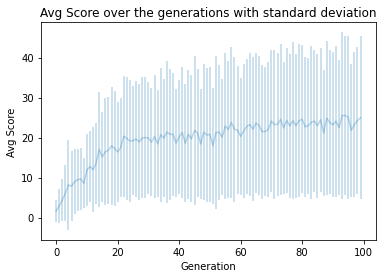

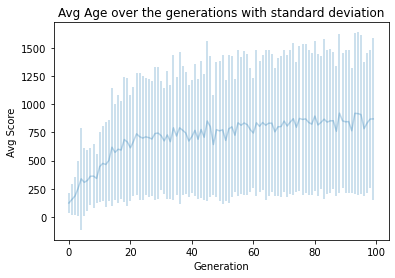

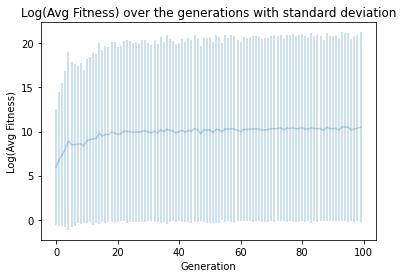

In [10]:
plot_features(data[0], std = True)

# Comparing fitness functions

The input of the function needs to be a list with the names of the folders where the logs are stored. 

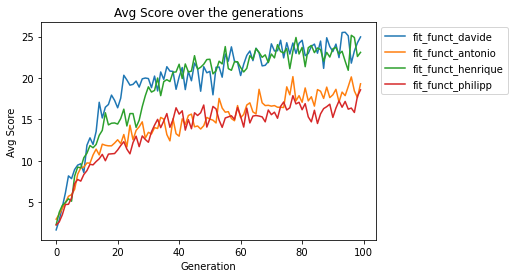

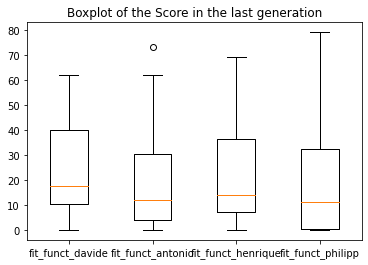

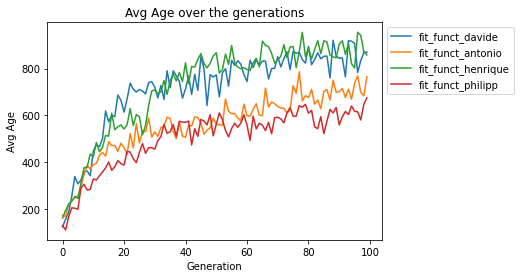

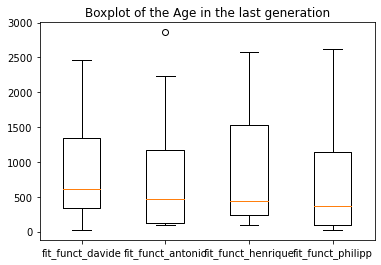

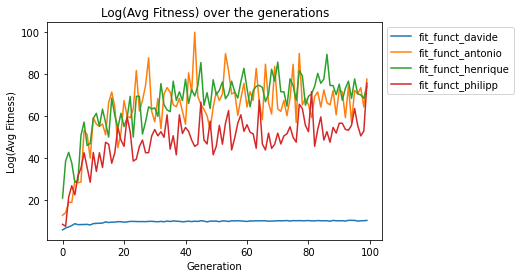

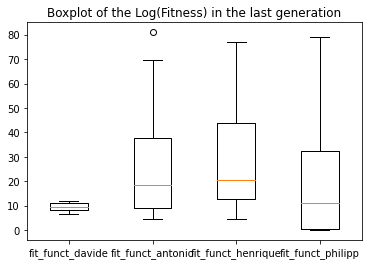

In [11]:
compare_data(['fit_funct_davide', 'fit_funct_antonio', 'fit_funct_henrique', 'fit_funct_philipp'], std = False, boxplot = True)

# Analysis on diversity, with and without fitness sharing

## Fitness 

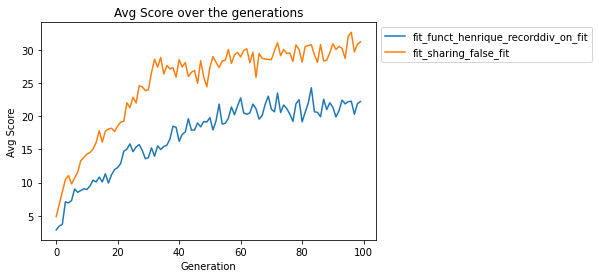

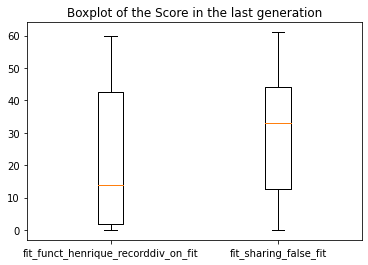

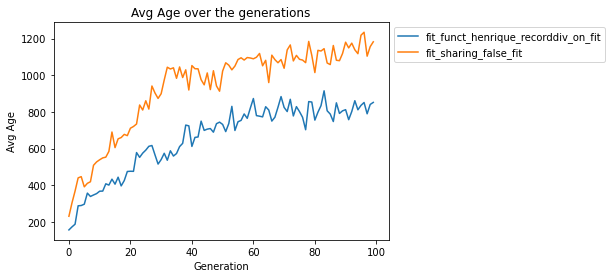

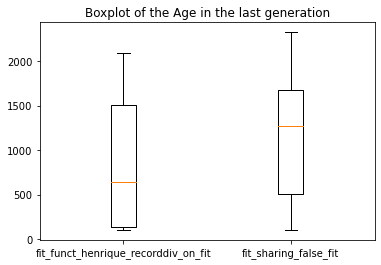

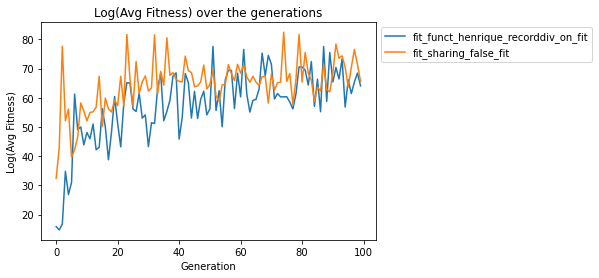

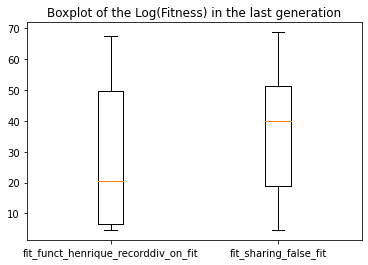

In [20]:
compare_data(['fit_funct_henrique_recorddiv_on_fit', 'fit_sharing_false_fit'], std = False, boxplot = True)

## Diversity

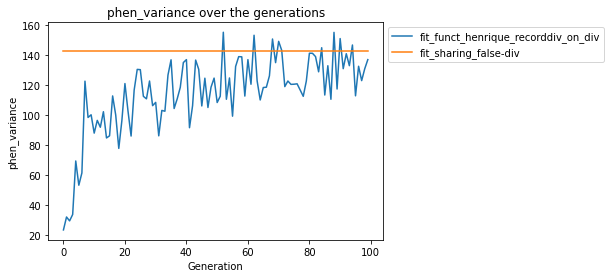

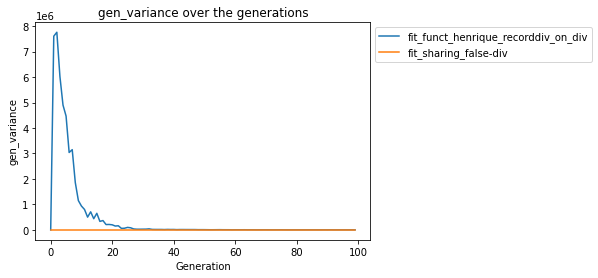

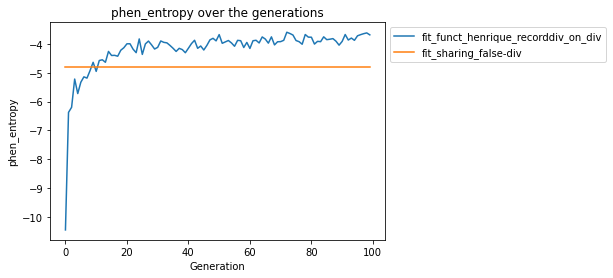

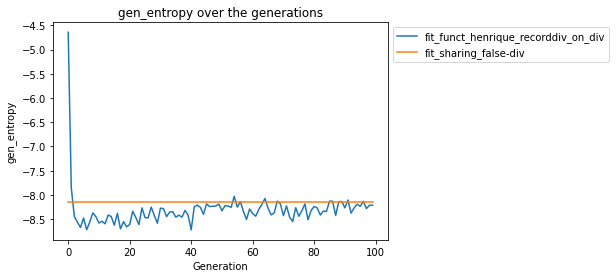

In [19]:
compare_data_diversity(['fit_funct_henrique_recorddiv_on_div', 'fit_sharing_false-div'])